In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import verde as vd
import pooch

In [2]:
data_full = pd.read_csv("MGD77_921744.m77t.xz", sep="\t", usecols=[0, 4, 5, 9]).dropna().reset_index(drop=True)
data_full

/home/leo/miniconda3/envs/rockhound-data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SURVEY_ID,LAT,LON,CORR_DEPTH
0,FM0501,24.77290,-89.58530,3559.0
1,FM0501,24.76070,-89.57550,3561.0
2,FM0501,24.74840,-89.56560,3555.0
3,FM0501,24.73600,-89.55570,3553.0
4,FM0501,24.72380,-89.54580,3553.0
...,...,...,...,...
2354729,EW0003,9.92284,-84.72557,20.0
2354730,EW0003,9.92282,-84.72565,20.0
2354731,EW0003,9.92283,-84.72570,20.0
2354732,EW0003,9.92284,-84.72574,21.0


Slice the data a bit

In [5]:
data = data_full[vd.inside((data_full.LON, data_full.LAT), (-88, -59, 7, 24))]
data.shape

(1938095, 4)

CPU times: user 92.9 ms, sys: 3.5 ms, total: 96.4 ms
Wall time: 94.2 ms


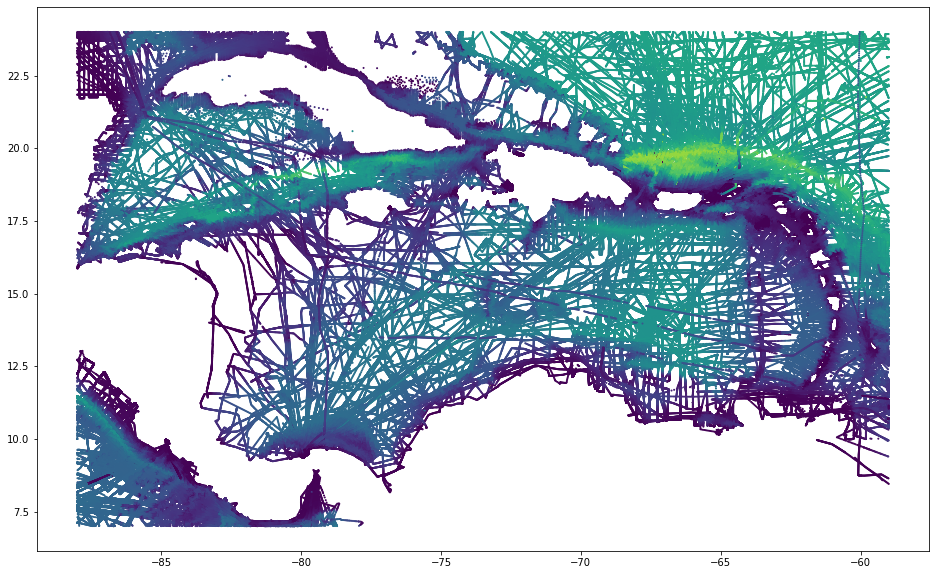

In [9]:
%%time
plt.figure(figsize=(16, 10))
plt.scatter(data.LON, data.LAT, c=data.CORR_DEPTH, s=1)

Block reduce and plot to check how long that would take.

In [12]:
%%time
coords, bathy = vd.BlockReduce(np.median, spacing=0.1).filter((data.LON, data.LAT), data.CORR_DEPTH)
std = vd.BlockReduce(np.std, spacing=0.1).filter((data.LON, data.LAT), data.CORR_DEPTH)[1]
bathy.size

CPU times: user 2.11 s, sys: 93 ms, total: 2.2 s
Wall time: 2.2 s


30208

CPU times: user 18.7 ms, sys: 3.56 ms, total: 22.2 ms
Wall time: 19.3 ms


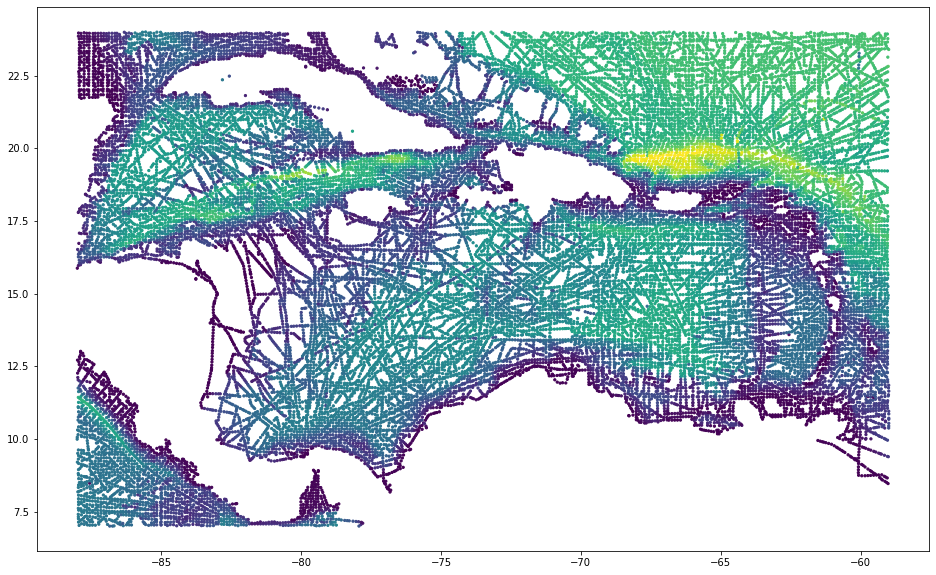

In [11]:
%%time
plt.figure(figsize=(16, 10))
plt.scatter(*coords, c=bathy, s=5)

CPU times: user 45.5 ms, sys: 3.2 ms, total: 48.7 ms
Wall time: 46.3 ms


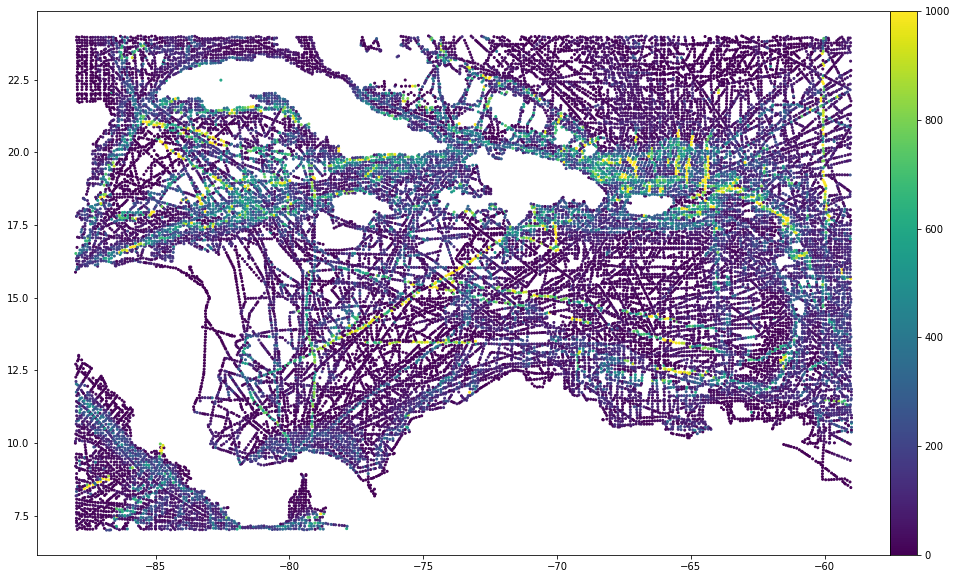

In [19]:
%%time
plt.figure(figsize=(18, 10))
plt.scatter(*coords, c=std, s=4, vmax=1000)
plt.colorbar(pad=0)

In [20]:
fname = "bathymetry-caribbean.csv.xz"
data.to_csv(fname, index=False)
print(f"{fname}: md5:{pooch.file_hash(fname, alg='md5')}")
print(f"size: {os.path.getsize(fname) / 1e6} Mb")

bathymetry-caribbean.csv.xz: md5:595a332c4f6a0310ba7458319beaa0cf
size: 9.05264 Mb
